# Electric Vehicle Presence Discovery

## EDA

In [1]:
#import packages
import datetime as dat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load data
df = pd.read_csv('Data/averagehour.csv')
#view data
df.head()

,Unnamed: 0,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,car1_y
0,0,59,1.752956,Single-Family Home,Austin,0,2011.0,3825.0,0
1,1,77,1.638684,Single-Family Home,Austin,1,2009.0,2669.0,0
2,2,86,1.495249,Single-Family Home,Austin,0,1948.0,1788.0,0
3,3,93,1.051423,Single-Family Home,Austin,1,1993.0,2934.0,0
4,4,94,0.691208,Single-Family Home,Austin,0,1975.0,1713.0,0


In [3]:
#drop the unamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
#rename variable to be more understandable
#from car1_y to EV

df['EV'] = df['car1_y']
#this created a new variable of equaltity to car1_y named EV
#we only need EV not car1_y, we can drop car1_y
df = df.drop(['car1_y'], axis=1)

In [5]:
df.head()

,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,EV
0,59,1.752956,Single-Family Home,Austin,0,2011.0,3825.0,0
1,77,1.638684,Single-Family Home,Austin,1,2009.0,2669.0,0
2,86,1.495249,Single-Family Home,Austin,0,1948.0,1788.0,0
3,93,1.051423,Single-Family Home,Austin,1,1993.0,2934.0,0
4,94,0.691208,Single-Family Home,Austin,0,1975.0,1713.0,0


### categorical Variables


In [6]:
city_counts = df['city'].value_counts()
city_counts
#lookat city

Austin       187
Boulder       16
Dallas         3
San Diego      2
Plano          2
Houston        1
Humble         1
Coppell        1
Grapevine      1
Name: city, dtype: int64

In [7]:
# recode to be Austin or other
df['city'] = np.where(df['city']=='Austin', 1, 0)
city_counts = df['city'].value_counts()
city_counts

1    187
0     27
Name: city, dtype: int64

In [8]:
#look at builiding type
building_type = df['building_type'].value_counts()
building_type

Single-Family Home    201
Town Home              11
Mobile Home             1
Apartment               1
Name: building_type, dtype: int64

In [9]:

#recode building_type
df['building_type'] = np.where(df['building_type']=='Single-Family Home', 1, 0)
building_counts = df['building_type'].value_counts()
building_counts

1    201
0     13
Name: building_type, dtype: int64

In [10]:
#Understand EV
df.groupby('EV').mean()

,dataid,use,building_type,city,pv,house_construction_year,total_square_footage
EV,,,,,,,
0,5167.928994,1.255491,0.946746,0.857988,0.573964,1989.668639,2191.050296
1,5295.800000,1.657467,0.911111,0.933333,0.888889,1994.777778,2475.233333


In [11]:
df.groupby('EV').dataid.nunique()

EV
0    169
1     45
Name: dataid, dtype: int64

In [12]:
#look at EV and PV
PV_EV = pd.crosstab(index=df["EV"],
                       columns=[df['pv']])

PV_EV


pv,0,1
EV,,
0,72,97
1,5,40


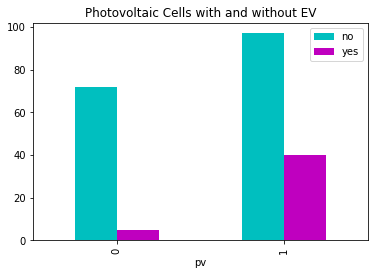

In [13]:

#create barchart to compare Pv and EV
PV_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.title("Photovoltaic Cells with and without EV")
plt.legend(['no','yes'])  

In [14]:
#look at percentages
round(PV_EV.transform(lambda x: x/x.sum()),2)

pv,0,1
EV,,
0,0.94,0.71
1,0.06,0.29


In [15]:
# building type and EV
buildingtype_EV = pd.crosstab(index=df["EV"],
                       columns=[df['building_type']])

buildingtype_EV

building_type,0,1
EV,,
0,9,160
1,4,41


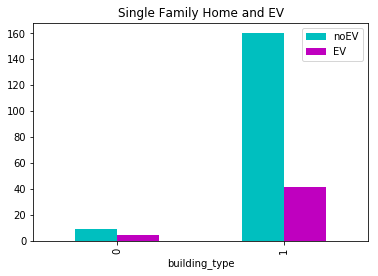

In [16]:


buildingtype_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.title("Single Family Home and EV")
plt.legend(['noEV', 'EV'])

In [17]:
#look at percentages
round(buildingtype_EV.transform(lambda x: x/x.sum()),2)

building_type,0,1
EV,,
0,0.69,0.8
1,0.31,0.2


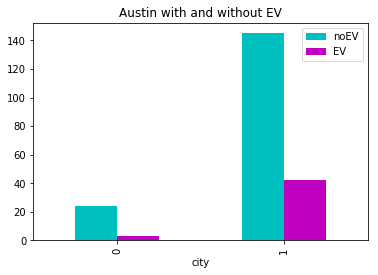

In [18]:
#location and eV
city_EV = pd.crosstab(index=df["EV"],
                       columns=[df['city']])
city_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.title("Austin with and without EV")
plt.legend(['noEV', 'EV'])

In [19]:
city_EV

city,0,1
EV,,
0,24,145
1,3,42


In [20]:
round(city_EV.transform(lambda x: x/x.sum()),2)


city,0,1
EV,,
0,0.89,0.78
1,0.11,0.22


### Continuous Features

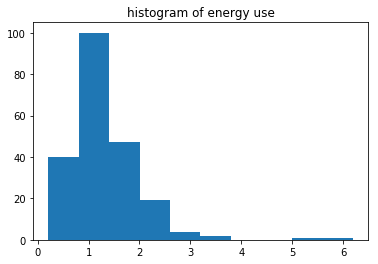

In [21]:
#look at enregy use
plt.hist(df['use'])
plt.title("histogram of energy use")
plt.show()

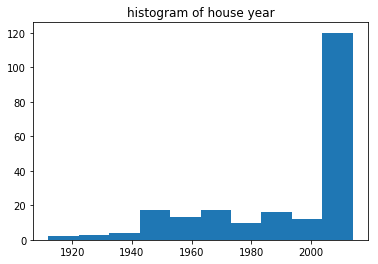

In [22]:
#look at house construction year
plt.hist(df['house_construction_year'])
plt.title("histogram of house year")
plt.show()

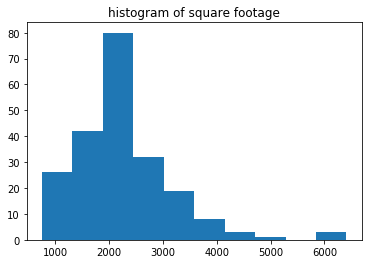

In [23]:
#look at total square footage
plt.hist(df['total_square_footage'])
plt.title("histogram of square footage")
plt.show()

#### plot EV with other variables to see how they relate

In [24]:
#plot EV with other features to see how they relate
groupbyEV =df.groupby('EV')

No handles with labels found to put in legend.


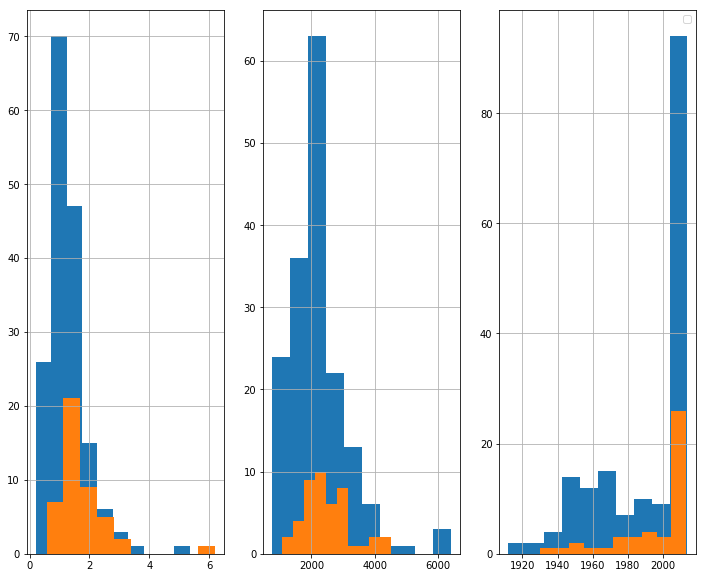

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
for axis, col in zip(axes, ['use', 'total_square_footage', 'house_construction_year']):
    groupbyEV[col].hist(ax=axis)
plt.legend()

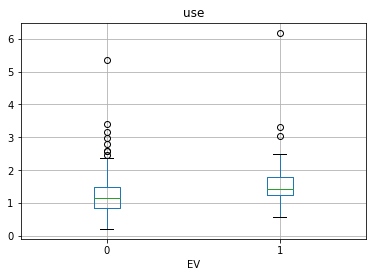

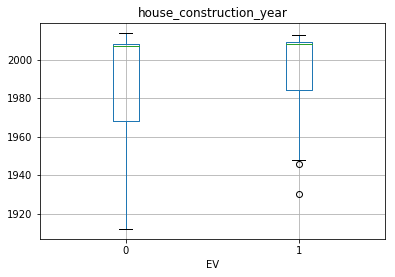

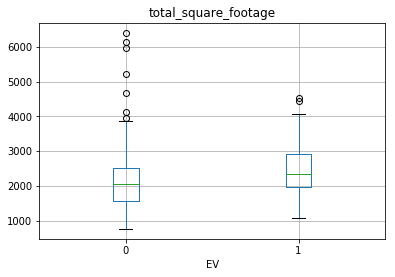

In [26]:
boxplotuse = df.boxplot(column=['use'], by = 'EV')
plt.suptitle("")
plt.show()
boxplotyear = df.boxplot(column=['house_construction_year'], by = 'EV')
plt.suptitle("")
plt.show()
boxplotsqfeet = df.boxplot(column=['total_square_footage'], by = 'EV')
plt.suptitle("")
plt.show()


### t test on energy use between ev and non ev homes

In [27]:
df.describe()

,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,EV
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,5194.817757,1.340019,0.939252,0.873832,0.640187,1990.742991,2250.808411,0.210280
std,3015.338041,0.728233,0.239427,0.332817,0.481071,24.654501,903.651633,0.408463
min,59.000000,0.208700,0.000000,0.000000,0.000000,1912.000000,758.000000,0.000000
25%,2682.000000,0.875196,1.000000,1.000000,0.000000,1971.500000,1652.000000,0.000000
50%,5260.500000,1.230613,1.000000,1.000000,1.000000,2007.000000,2122.000000,0.000000
75%,7923.750000,1.558529,1.000000,1.000000,1.000000,2008.000000,2669.000000,0.000000
max,9983.000000,6.188534,1.000000,1.000000,1.000000,2014.000000,6408.000000,1.000000


In [28]:
df.groupby('EV').dataid.nunique()

EV
0    169
1     45
Name: dataid, dtype: int64

In [29]:
#create two dataframes for with and without EV
EV = df.loc[(df['EV']==1)]
NOEV = df.loc[(df['EV']==0)]

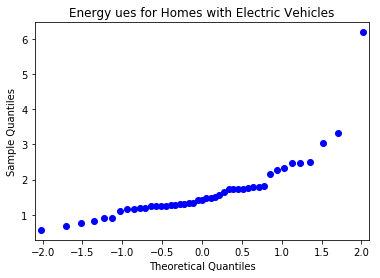

In [30]:
#use a qq plot to look for normality
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.title("Energy ues for Homes with Electric Vehicles")
plt.show()

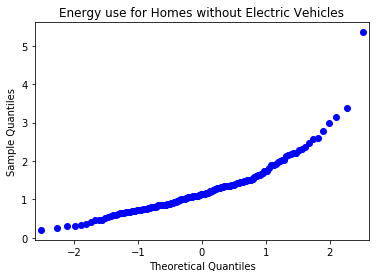

In [31]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.title("Energy use for Homes without Electric Vehicles")
plt.show()

In [32]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy. 

2.7922847933801256 0.007123712930791133


In [33]:
#try removing outliers and see if plots look different
sorteduse = df.sort_values(by=['use'])
q1, q3 = np.percentile(sorteduse['use'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
nooutlieruse = df.loc[(df['use']>lowerbound)&(df['use']<upperbound)]
nooutlieruse.shape

(205, 8)

In [34]:
#create two dataframes for with and without EV
EV = nooutlieruse.loc[(nooutlieruse['EV']==1)]
NOEV = nooutlieruse.loc[(nooutlieruse['EV']==0)]

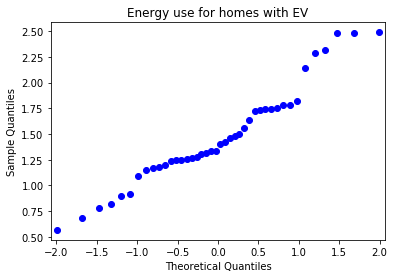

In [35]:
#use a qq plot to look for normality
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.title("Energy use for homes with EV")
plt.show()

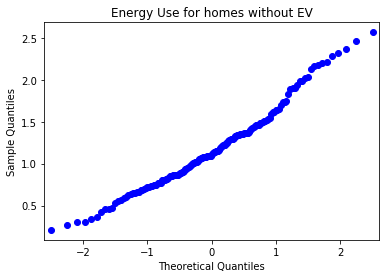

In [36]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.title("Energy Use for homes without EV")
plt.show()


In [37]:
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy.

3.594083349469587 0.0006316145372417538


## Correlation

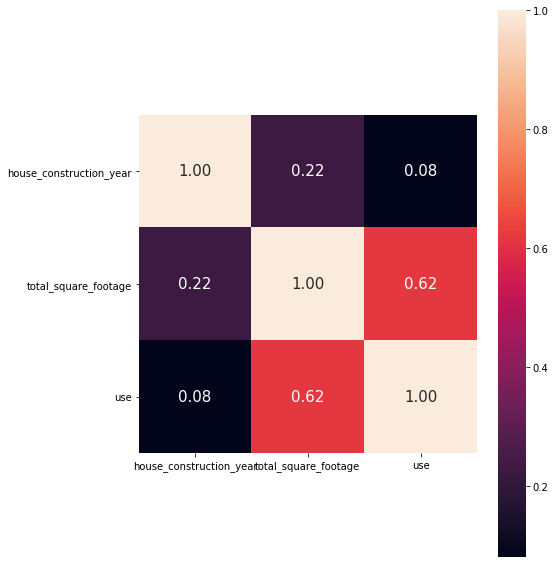

In [38]:
#correlation on original continous features
variables = ['house_construction_year','total_square_footage']
target = 'use'
cm = np.corrcoef(df[variables + [target]].T)
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

### train test split

In [39]:
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df[target]

features = df.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df[features]

In [40]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [41]:
features

['use',
 'building_type',
 'city',
 'pv',
 'house_construction_year',
 'total_square_footage']

### oversampling

In [42]:
#oversampling
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [43]:
import imblearn
imblearn.__version__

'0.4.3'

In [44]:
np.unique(y_train_res, return_counts=True)


(array([0, 1], dtype=int64), array([118, 118], dtype=int64))

### standardize

In [45]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


### logistic regression model

In [46]:
import statsmodels.api as statsmodels

logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.535040
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.228     
Dependent Variable: y                AIC:              264.5388  
Date:               2019-04-07 15:53 BIC:              285.3218  
No. Observations:   236              Log-Likelihood:   -126.27   
Df Model:           5                LL-Null:          -163.58   
Df Residuals:       230              LLR p-value:      1.1131e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.4958      0.2597     1.9091    0.0563    -0.0132     1.0049
x2    -0.5296      0.1859    -2.8494    0.0044    -0.8

### Feature Importance

In [47]:
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(x_train_res, y_train_res)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.9449152542372882 Accuracy on test: 0.6923076923076923


In [48]:
traindataframe = pd.DataFrame(x_train_res, columns=[features])


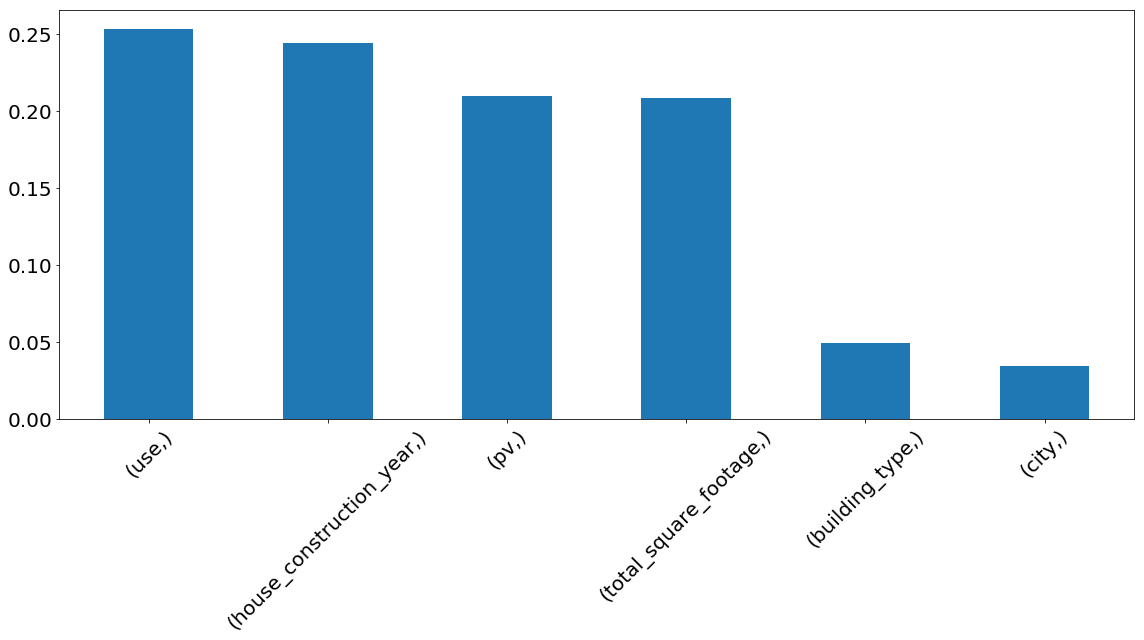

In [49]:

import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

### feature engineering

In [50]:
# convert house construction year to age of home
df2 = df.copy(deep=False)
df2['current_year'] = 2019
df2['age_of_house'] = df2['current_year'] - df2['house_construction_year']
df2 = df2.drop(['current_year', 'house_construction_year'], axis=1)
df2.head()

,dataid,use,building_type,city,pv,total_square_footage,EV,age_of_house
0,59,1.752956,1,1,0,3825.0,0,8.0
1,77,1.638684,1,1,1,2669.0,0,10.0
2,86,1.495249,1,1,0,1788.0,0,71.0
3,93,1.051423,1,1,1,2934.0,0,26.0
4,94,0.691208,1,1,0,1713.0,0,44.0


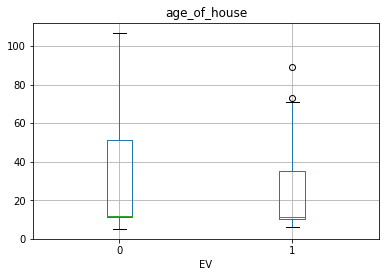

In [51]:
boxplotuse = df2.boxplot(column=['age_of_house'], by = 'EV',fontsize=10)
plt.suptitle("")
plt.show()

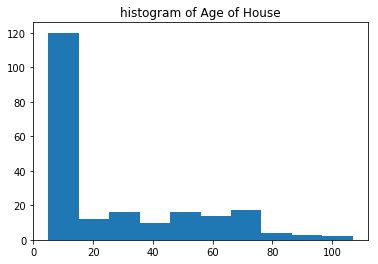

In [52]:
#histogram of age of house
plt.hist(df2['age_of_house'])
plt.title("histogram of Age of House")
plt.show()

In [53]:
#make use total for three years in stead of average hourly

#how many hours in 3 years
hoursinthreeyears = 24*365*3
df2['use'] = df2['use']*hoursinthreeyears
df2.head()

,dataid,use,building_type,city,pv,total_square_footage,EV,age_of_house
0,59,46067.678810,1,1,0,3825.0,0,8.0
1,77,43064.619488,1,1,1,2669.0,0,10.0
2,86,39295.153227,1,1,0,1788.0,0,71.0
3,93,27631.404293,1,1,1,2934.0,0,26.0
4,94,18164.954785,1,1,0,1713.0,0,44.0


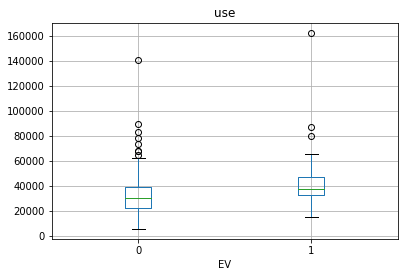

In [54]:
#check for normality wihtout outliers
boxplotuse = df2.boxplot(column=['use'], by = 'EV')
plt.suptitle("")
plt.show()

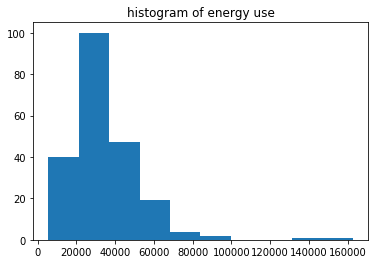

In [55]:
#look at enregy use
plt.hist(df2['use'])
plt.title("histogram of energy use")
plt.show()

In [56]:
#plot EV with other features to see how they relate
groupbyEV =df2.groupby('EV')

No handles with labels found to put in legend.


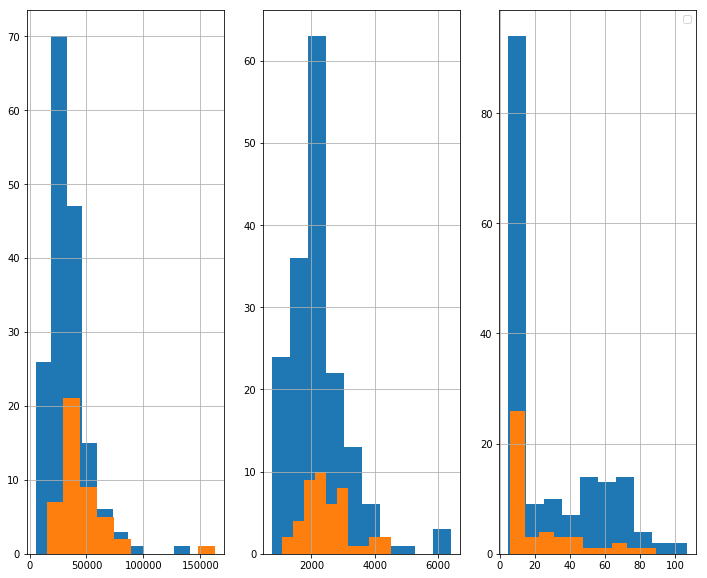

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
for axis, col in zip(axes, ['use', 'total_square_footage', 'age_of_house']):
    groupbyEV[col].hist(ax=axis)
plt.legend()

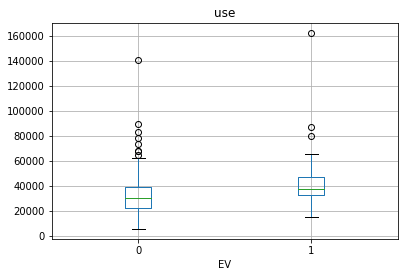

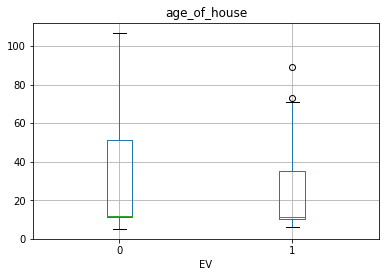

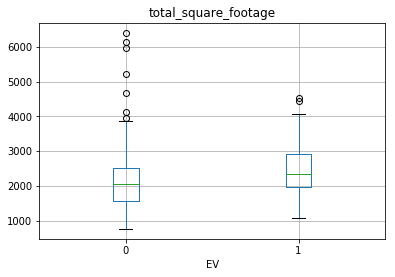

In [58]:
boxplotuse = df2.boxplot(column=['use'], by = 'EV')
plt.suptitle("")
plt.show()
boxplotyear = df2.boxplot(column=['age_of_house'], by = 'EV')
plt.suptitle("")
plt.show()
boxplotsqfeet = df2.boxplot(column=['total_square_footage'], by = 'EV')
plt.suptitle("")
plt.show()


### t test for different in energy use by houses with and without EV

In [59]:
# first check for normality from boxplots
#get rid of outliers
#outliers for use
sorteduse = df2.sort_values(by=['use'])
q1, q3 = np.percentile(sorteduse['use'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df2 = df2.loc[(df2['use']>lowerbound)&(df2['use']<upperbound)]
df2.shape

(205, 8)

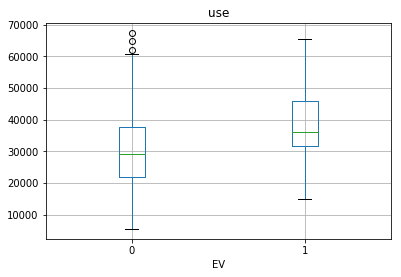

In [60]:
#check for normality wihtout outliers
boxplotuse = df2.boxplot(column=['use'], by = 'EV')
plt.suptitle("")
plt.show()

In [61]:
#create two dataframes for with and without EV
EV = df2.loc[(df2['EV']==1)]
NOEV = df2.loc[(df2['EV']==0)]

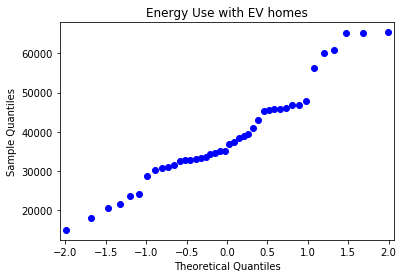

In [62]:
#use qq plot for normality on EV enerygy use
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.title("Energy Use with EV homes")
plt.show()

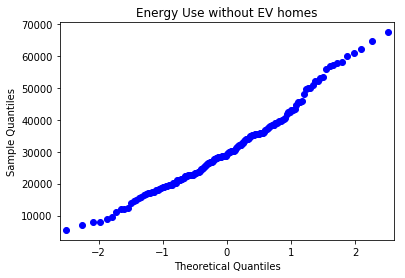

In [63]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.title("Energy Use without EV homes")
plt.show()

In [64]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy. 

3.5940833494695887 0.0006316145372417507


### Correlation

In [65]:
#run a correlation on continuous variables

# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
variables = ['age_of_house','total_square_footage']
target = 'use'
cm = np.corrcoef(df2[variables + [target]].T)

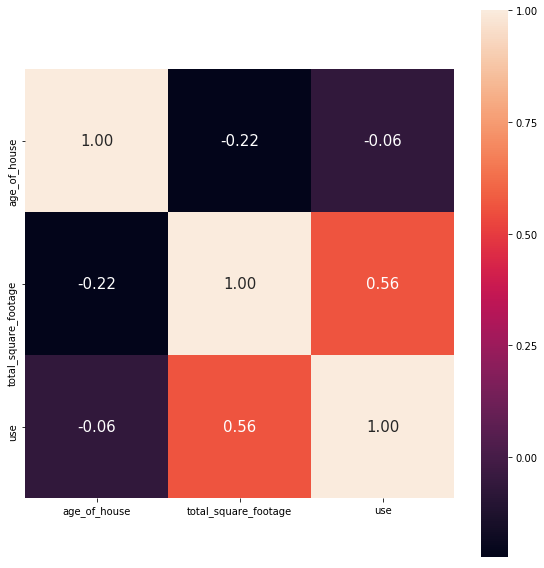

In [66]:
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

## Logistic Regression and Random Forest on featured Engineering dataframe

In [67]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df2[target]

features = df2.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df2[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
sm = SMOTE(random_state=12, ratio =1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#standardize
std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

#logistic regression model
logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.537111
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: y                AIC:              256.9224  
Date:               2019-04-07 15:54 BIC:              277.4985  
No. Observations:   228              Log-Likelihood:   -122.46   
Df Model:           5                LL-Null:          -158.04   
Df Residuals:       222              LLR p-value:      5.8975e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.5638      0.2250     2.5052    0.0122     0.1227     1.0048
x2    -0.5998      0.1947    -3.0800    0.0021    -0.9

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [68]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(x_train_res, y_train_res)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.9298245614035088 Accuracy on test: 0.6935483870967742


In [69]:
traindataframe = pd.DataFrame(x_train_res, columns=features)


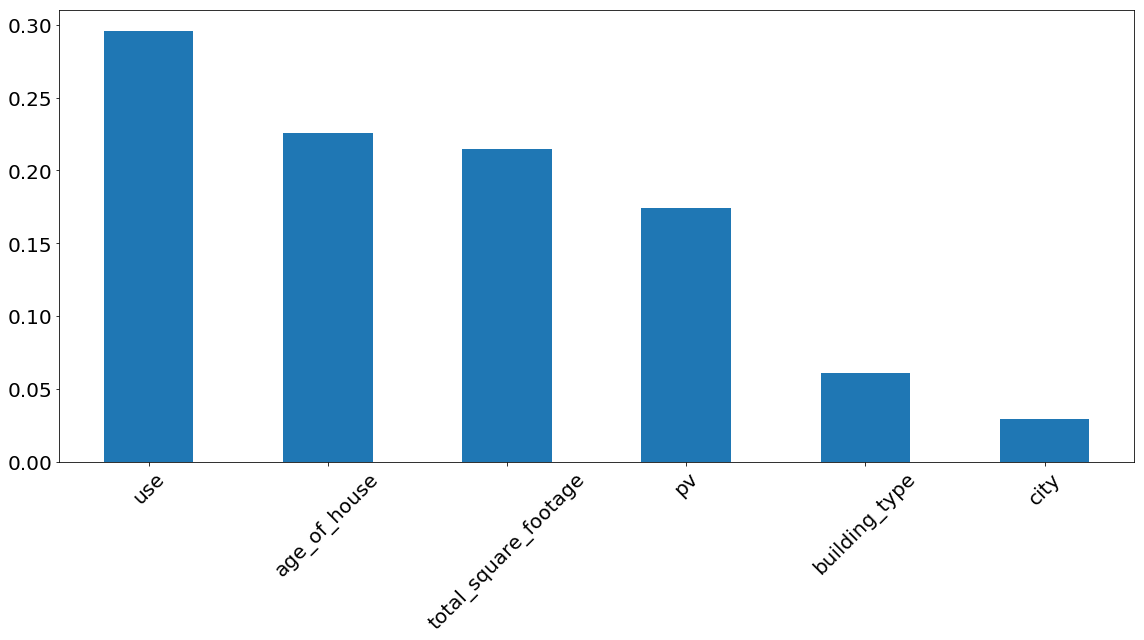

In [70]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

## Feature Engineering 
### Let's try use/square feet

In [71]:
df3 = df2.copy(deep=False)
df3['use/sqft'] = df3['use'] / df3['total_square_footage']
df3 = df3.drop(['use', 'total_square_footage'], axis=1)
df3.head()

,dataid,building_type,city,pv,EV,age_of_house,use/sqft
0,59,1,1,0,0,8.0,12.043838
1,77,1,1,1,0,10.0,16.135114
2,86,1,1,0,0,71.0,21.977155
3,93,1,1,1,0,26.0,9.417657
4,94,1,1,0,0,44.0,10.604177


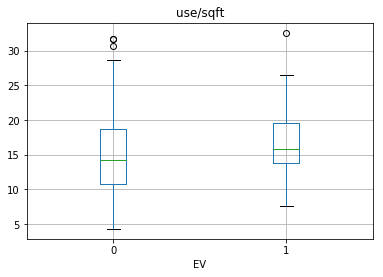

In [72]:
boxplotuse = df3.boxplot(column=['use/sqft'], by = 'EV')
plt.suptitle("")
plt.show()

## T test for difference in house Energy/sq ft use for EV and no EV

In [73]:
# first check for normality from boxplots
#get rid of outliers
#outliers for use
sorteduse = df3.sort_values(by=['use/sqft'])
q1, q3 = np.percentile(sorteduse['use/sqft'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df3 = df3.loc[(df3['use/sqft']>lowerbound)&(df3['use/sqft']<upperbound)]
df3.shape

(201, 7)

In [74]:
# based on box plot above use/sqft appears to be relatilvey normal iwthout outliers based on boxplot
#create two dataframes for with and without EV
EV = df3.loc[(df3['EV']==1)]
NOEV = df3.loc[(df3['EV']==0)]

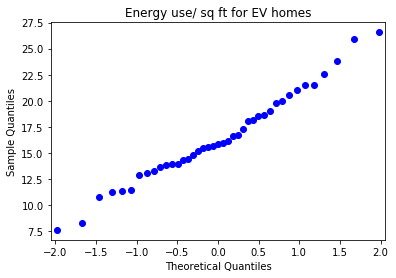

In [75]:
#use qq plot for normality on EV enerygy use
import statsmodels.api as sm
fig = sm.qqplot(EV['use/sqft'])
plt.title("Energy use/ sq ft for EV homes")
plt.rcParams.update({'font.size': 5})
plt.show()

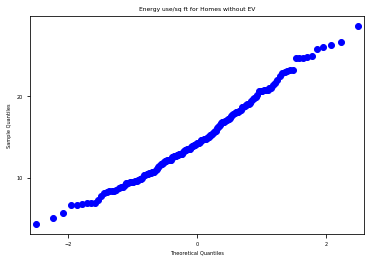

In [76]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use/sqft'])
plt.title("Energy use/sq ft for Homes without EV")
plt.rcParams.update({'font.size': 20})
plt.show()

In [77]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use/sqft'], NOEV['use/sqft'], equal_var=False)
print(t2, p2)

#The p-value is smaller than .05. We  reject the null hypothesis at the .05 significance level There is a difference between houses with and without EV based ontheir eneryg use per square foot. 

2.0500785254083804 0.04397671953212958


## Correlation

In [78]:
#run a correlation on continuous variables

# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
variables = ['age_of_house']
target = 'use/sqft'
cm = np.corrcoef(df3[variables + [target]].T)

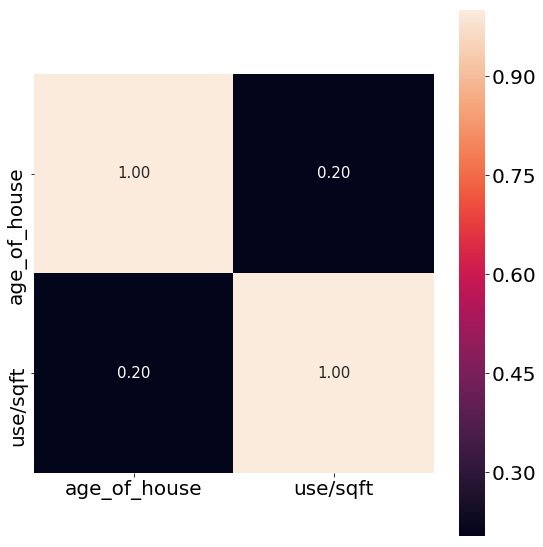

In [79]:
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

## Logistic Regression and Random Forest

In [80]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df3[target]

features = df3.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df3[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
sm = SMOTE(random_state=12, ratio =1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#standardize
std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

#logistic regression model
logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.582444
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.160     
Dependent Variable: y                AIC:              268.6052  
Date:               2019-04-07 15:54 BIC:              285.6186  
No. Observations:   222              Log-Likelihood:   -129.30   
Df Model:           4                LL-Null:          -153.88   
Df Residuals:       217              LLR p-value:      5.4272e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.6910      0.1988    -3.4765    0.0005    -1.0806    -0.3014
x2     0.2710      0.1887     1.4356    0.1511    -0.0

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [81]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(x_train_res, y_train_res)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.9279279279279279 Accuracy on test: 0.6557377049180327


In [82]:
traindataframe = pd.DataFrame(x_train_res, columns=features)


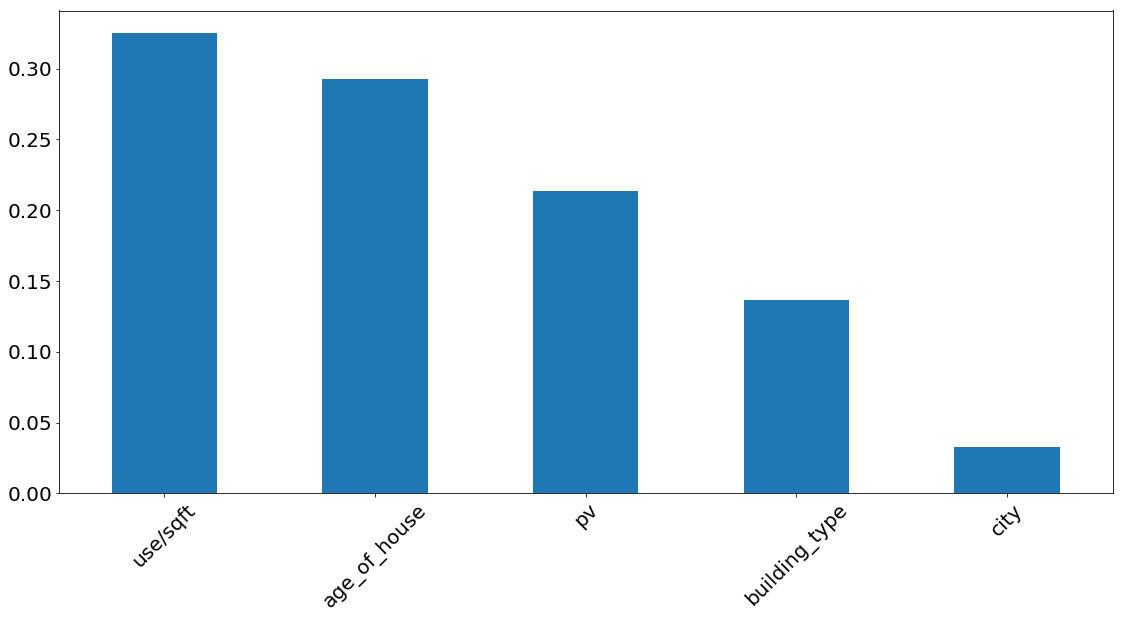

In [83]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

## ODDS Ratio

In [84]:
#look at EV and PV
PV_EV = pd.crosstab(index=df["EV"],
                       columns=[df['pv']])

PV_EV


pv,0,1
EV,,
0,72,97
1,5,40


In [85]:
ODDS = (PV_EV.iloc[0,0]*PV_EV.iloc[1,1]) / (PV_EV.iloc[0,1]*PV_EV.iloc[1,0])

ODDS

#The odds of having an electric vehicle among those with PV are 5.93 times the odds of having an electric vehicle among those without PV. 

5.938144329896907

In [86]:
# building type and EV
buildingtype_EV = pd.crosstab(index=df["EV"],
                       columns=[df['building_type']])

buildingtype_EV

building_type,0,1
EV,,
0,9,160
1,4,41


In [87]:
ODDS = (buildingtype_EV.iloc[0,0]*buildingtype_EV.iloc[1,1]) / (buildingtype_EV.iloc[0,1]*buildingtype_EV.iloc[1,0])

ODDS
#The odds of having an electric vehicle among those with single family home are .57 times the odss of having an electric vehicle among those with our housing types. 

0.5765625

In [88]:
city_EV

city,0,1
EV,,
0,24,145
1,3,42


In [89]:
ODDS = (city_EV.iloc[0,0]*city_EV.iloc[1,1]) / (city_EV.iloc[0,1]*city_EV.iloc[1,0])
ODDS
#The odds of having an electric vehicle among those that live in Austin are 2.3 times the odds of having an electric vehicle among those that live elsewhere. 

2.317241379310345

## Try Oversampling methods

###  The sample is 80, 20 let's try it

In [90]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df2[target]

features = df2.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df2[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
#sm = SMOTE(random_state=12, ratio =1.0)
#x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#standardize
std_scaler = StandardScaler()

# Standardize the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [91]:
features

['use', 'building_type', 'city', 'pv', 'total_square_footage', 'age_of_house']

In [92]:
#logistic regression model
logit_model = statsmodels.Logit(y_train, X_train)

result = logit_model.fit()

print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.649026
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.287  
Dependent Variable: EV               AIC:              197.6213
Date:               2019-04-07 15:54 BIC:              215.3984
No. Observations:   143              Log-Likelihood:   -92.811 
Df Model:           5                LL-Null:          -72.109 
Df Residuals:       137              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.2904     0.2279    1.2742   0.2026   -0.1563   0.7372
x2       -0.2513     0.1940   -1.2955   0.1951   -0.6316   0.1289
x3        0.0113 

In [93]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(X_train, y_train)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(X_train, y_train)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.8881118881118881 Accuracy on test: 0.7741935483870968


In [94]:
traindataframe = pd.DataFrame(X_train, columns=features)

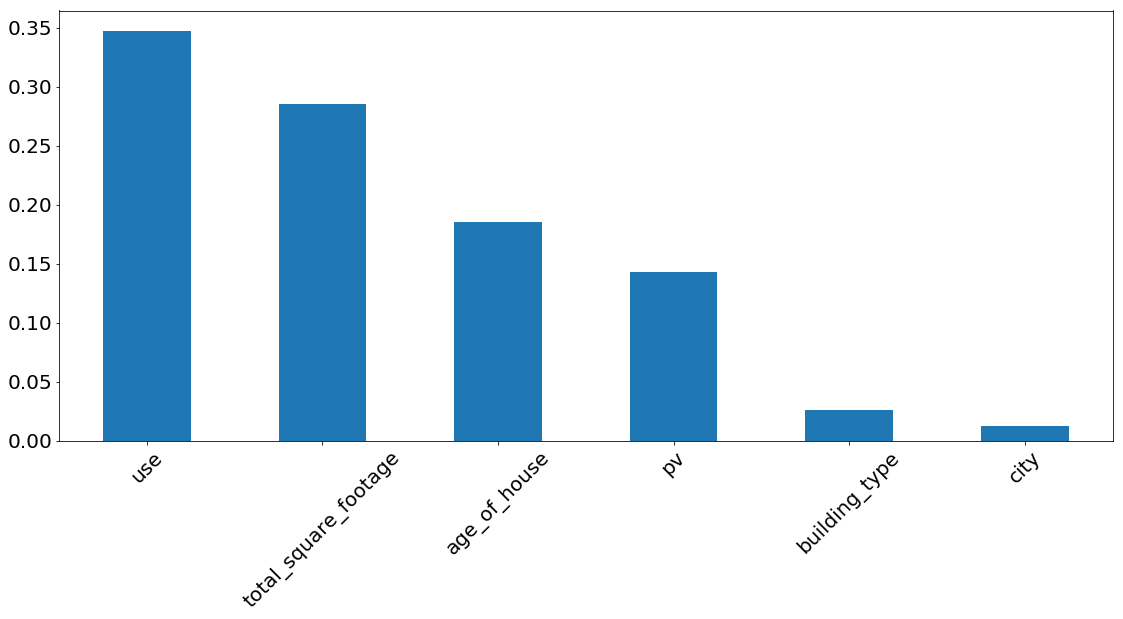

In [95]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

## Let's try 70 30

In [96]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df2[target]

features = df2.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df2[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
sm = SMOTE(random_state=12, ratio =.45)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#np.unique(y_train_res, return_counts=True)


#standardize
std_scaler = StandardScaler()

# Standardize the training data
X_train = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [97]:
#logistic regression model
logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.539426
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.128     
Dependent Variable: y                AIC:              190.0107  
Date:               2019-04-07 15:54 BIC:              208.6464  
No. Observations:   165              Log-Likelihood:   -89.005   
Df Model:           5                LL-Null:          -102.03   
Df Residuals:       159              LLR p-value:      8.7194e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0000      0.0000     2.0416    0.0412     0.0000     0.0001
x2    -1.9402      0.6873    -2.8229    0.0048    -3.2

In [98]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(x_train_res, y_train_res)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.9212121212121213 Accuracy on test: 0.7903225806451613


In [99]:
traindataframe = pd.DataFrame(x_train_res, columns=features)

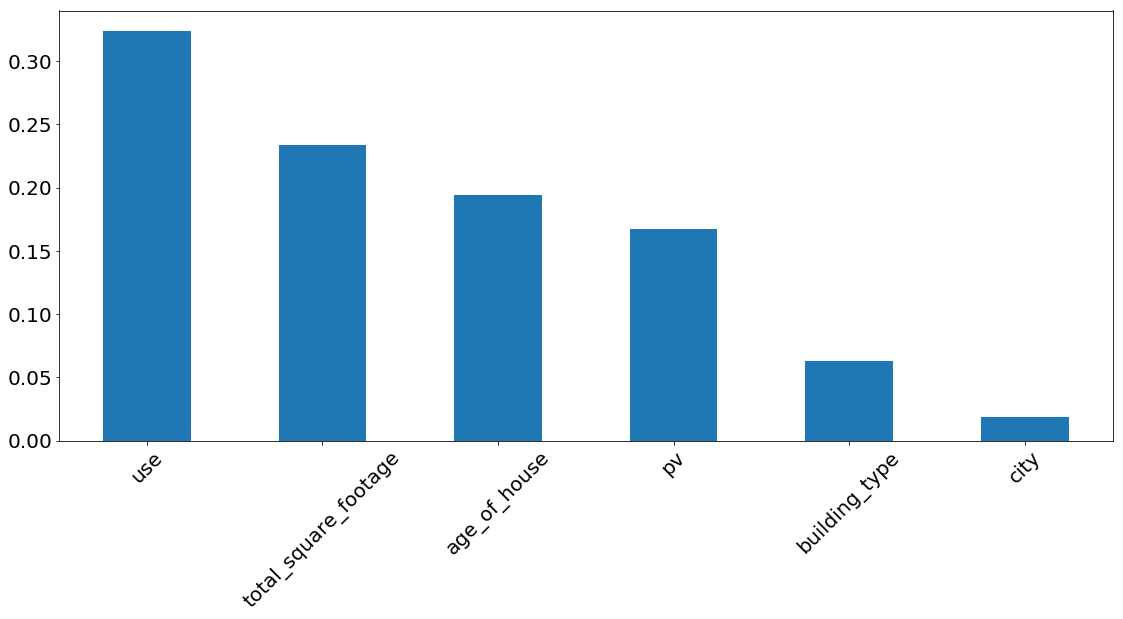

In [100]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

# Let's try 60 40

In [101]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df2[target]

features = df2.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df2[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
sm = SMOTE(random_state=12, ratio =.65)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#np.unique(y_train_res, return_counts=True)


#standardize
std_scaler = StandardScaler()

# Standardize the training data
X_train = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [102]:
#logistic regression model
logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.559152
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.166     
Dependent Variable: y                AIC:              222.2412  
Date:               2019-04-07 15:54 BIC:              241.6598  
No. Observations:   188              Log-Likelihood:   -105.12   
Df Model:           5                LL-Null:          -126.02   
Df Residuals:       182              LLR p-value:      6.4472e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0000      0.0000     2.1199    0.0340     0.0000     0.0001
x2    -2.1856      0.6940    -3.1491    0.0016    -3.5

In [103]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(x_train_res, y_train_res)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.925531914893617 Accuracy on test: 0.7903225806451613


In [104]:
traindataframe = pd.DataFrame(x_train_res, columns=features)

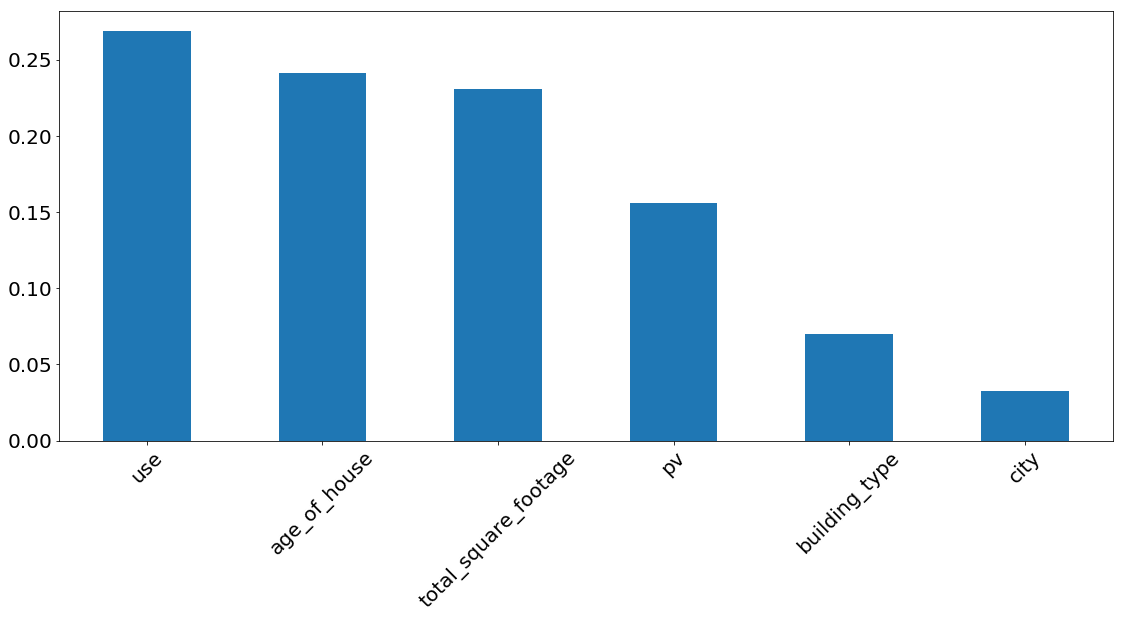

In [105]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

In [107]:
#It appears that the 50,50 model on DF2 is the best featured engineered model
#let's export that dataframe
df2.to_csv('Data/dataframe.csv')